In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
sns.set_theme()

In [2]:
data_dir = "/oak/stanford/groups/akundaje/atwang/gp_mouse_sc_analyses/results/assembly_2/mm10/merge_peak_scores"
data_path = os.path.join(data_dir, "scores.tsv")



# Per-Peak Visualizations

Now, I look into the distributions of several metrics across individual mouse peaks.

In [3]:

data = pd.read_csv(data_path, sep='\t', header=0)
data

chr  start_x    end_x             1_x    2_x 3_x       4_x  \
0              chr1  3671463  3671842   total_peak_72     86   .   6.12150   
1              chr1  3671463  3671842   total_peak_72     86   .   6.12150   
2              chr1  3671463  3671842   total_peak_72     86   .   6.12150   
3              chr1  3671463  3671842   total_peak_72     86   .   6.12150   
4              chr1  3671463  3671842   total_peak_72     86   .   6.12150   
...             ...      ...      ...             ...    ...  ..       ...   
9160956  JH584304.1   103146   103422  total_peak_158   3423   .   5.09561   
9160957  JH584304.1    98307    98495  total_peak_155    379   .   2.36005   
9160958  JH584304.1   100557   100853  total_peak_156  23654   .  16.20520   
9160959  JH584304.1   101688   101902  total_peak_157   1201   .   3.15913   
9160960  JH584304.1   103764   104115  total_peak_159  15741   .  12.33960   

                5_x         6_x  summit  ...  contrib_counts_e_dist  \
0           8.69238     6.15342     257  ...               1.361077   
1           8.69238     6.15342     257  ...               1.091363   
2           8.69238     6.15342     257  ...               0.300629   
3           8.69238     6.15342     257  ...               0.352208   
4           8.69238     6.15342     257  ...               0.375611   
...             ...         ...     ...  ...                    ...   
9160956   342.36900   339.20900     165  ...               0.557473   
9160957    37.92770    35.67400      88  ...               0.657317   
9160958  2365.47000  2359.75000     161  ...               0.663446   
9160959   120.15100   117.44800     104  ...               0.600679   
9160960  1574.12000  1568.63000     110  ...               0.563898   

         contrib_counts_nlp  contrib_counts_nlq  \
0                  1.322219            1.298615   
1                  0.778151            0.767156   
2                       inf                 inf   
3                  0.352183            0.349219   
4                       inf                 inf   
...                     ...                 ...   
9160956            2.100371            2.080606   
9160957                 inf                 inf   
9160958            1.255273            1.242692   
9160959            2.100371            2.080606   
9160960            2.100371            2.080606   

         ss_self_contrib_profiles_dist_mean  \
0                                  0.653118   
1                                  0.147818   
2                                  0.595032   
3                                  0.529627   
4                                  0.162561   
...                                     ...   
9160956                            0.735959   
9160957                            0.647164   
9160958                            0.787424   
9160959                            0.612658   
9160960                            0.782277   

         xs_self_contrib_profiles_dist_mean  cross_contrib_profiles_dist_mean  \
0                                  0.665370                          0.784419   
1                                  0.119583                          0.426856   
2                                  0.145333                          0.618608   
3                                  0.674370                          1.109364   
4                                  0.112098                          0.465244   
...                                     ...                               ...   
9160956                            0.667215                          0.941443   
9160957                            0.181839                          0.985368   
9160958                            0.924764                          0.970716   
9160959                            0.662879                          0.988712   
9160960                            0.666250                          0.938557   

         contrib_profiles_e_dist  contrib_profiles_nlp  contrib_profiles_nl

## Mean vs Variance per peak

Here, we look at the means and variances of divergence between species for each mouse peak.  

The x axis for each subplot is the difference of the predicted log10 counts from the GP models and the mouse models, averaged over 5 folds. A positive value indicates a greater prediction from the GP models relative to the mouse models.

The y axis is the estimated standard deviation across folds of the divergence between the two species' count outputs. A higher standard deviation indicates higher variances across folds.    
The color indicates the significance of the difference between species for each peak, as evaluated using the Mann-Whitney U test on quantile-normalized predictions. I also looked into using DESeq also but I its assumptions are geared towards observed counts from experimental data and aren't really appropiate for analyzing predicted counts from models (more below).

Here, we see basically no correlation between mean and variance, which directly contradicts with the assumptions made by DESeq. The exceptions are mCM-1-3, Other-2, and pCM-3, though these seem to be due to technical issues (more later).

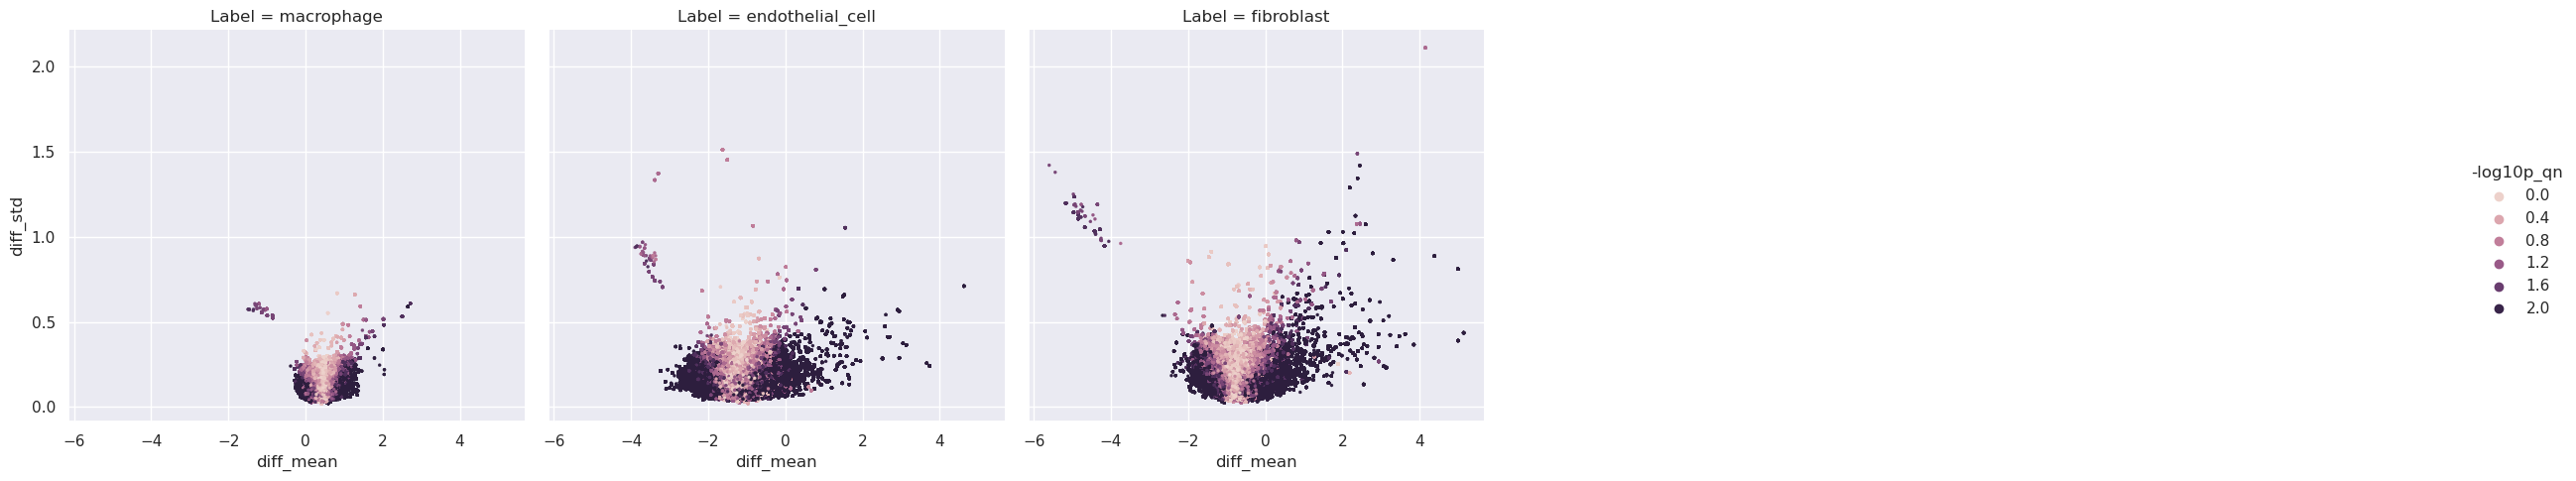

In [7]:
sns.relplot(data=data, x="diff_mean", y="diff_std", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Mouse vs. GP predictions

Next, we look at the mean predictions of the mouse and GP models on the mouse peaks.  

The x axis is the mean predicted log10 counts as predicted by the mouse models, averaged across 5 folds. The y axis is the mean predicted log10 counts as predicted by the GP models.

And as before, the color indicates the significance of the difference between species.

Note that within each species and each cell types, the predicted log counts are zero-centered across peaks to account for read depth differences across species. Thus, the intercept in the plots are always zero. 

For most cell types, the relationship between the axes is linear with a slope of 1. 

However, for some cell types, the slope is significantly different than 1 or even non-linear. I account for this when calculating significance by quantile-normalizing the predicted counts from each model. It is unclear whether this phenomenon is an artifact of training or represents real biology. 

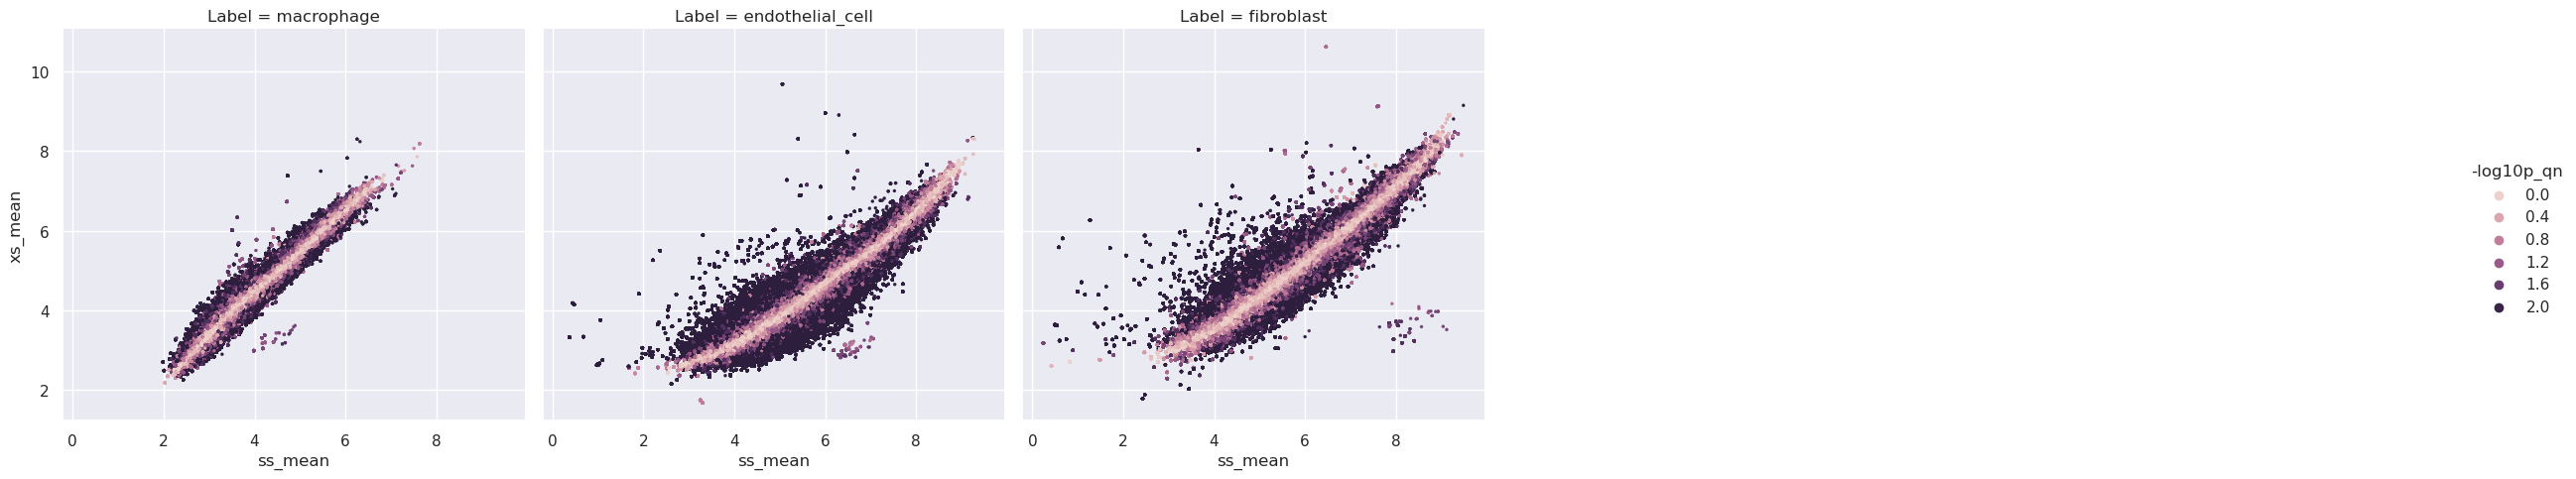

In [8]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

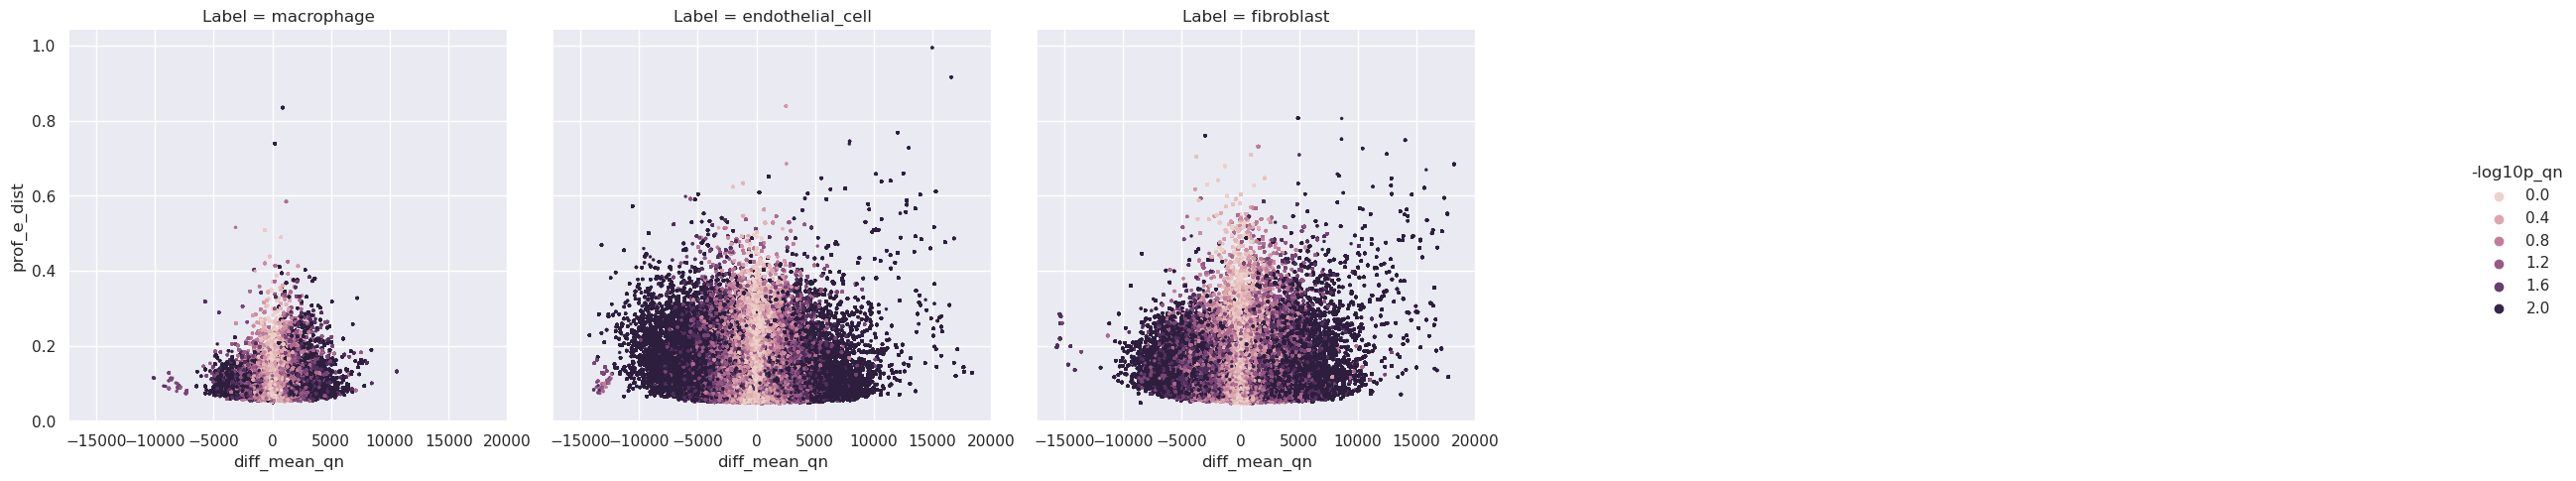

In [23]:
g = sns.relplot(data=data, x="diff_mean_qn", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

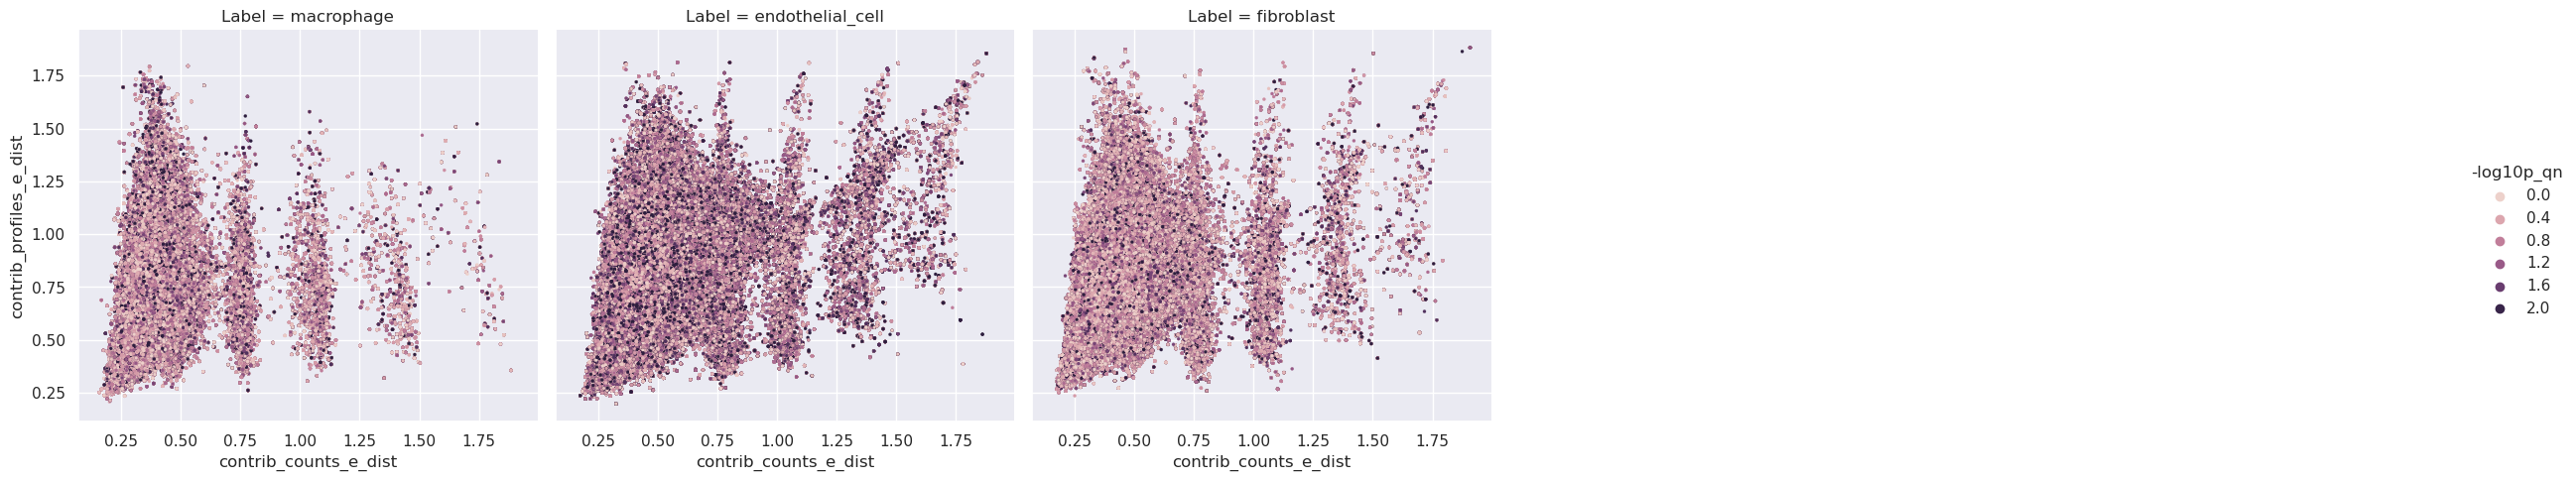

In [10]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="contrib_profiles_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

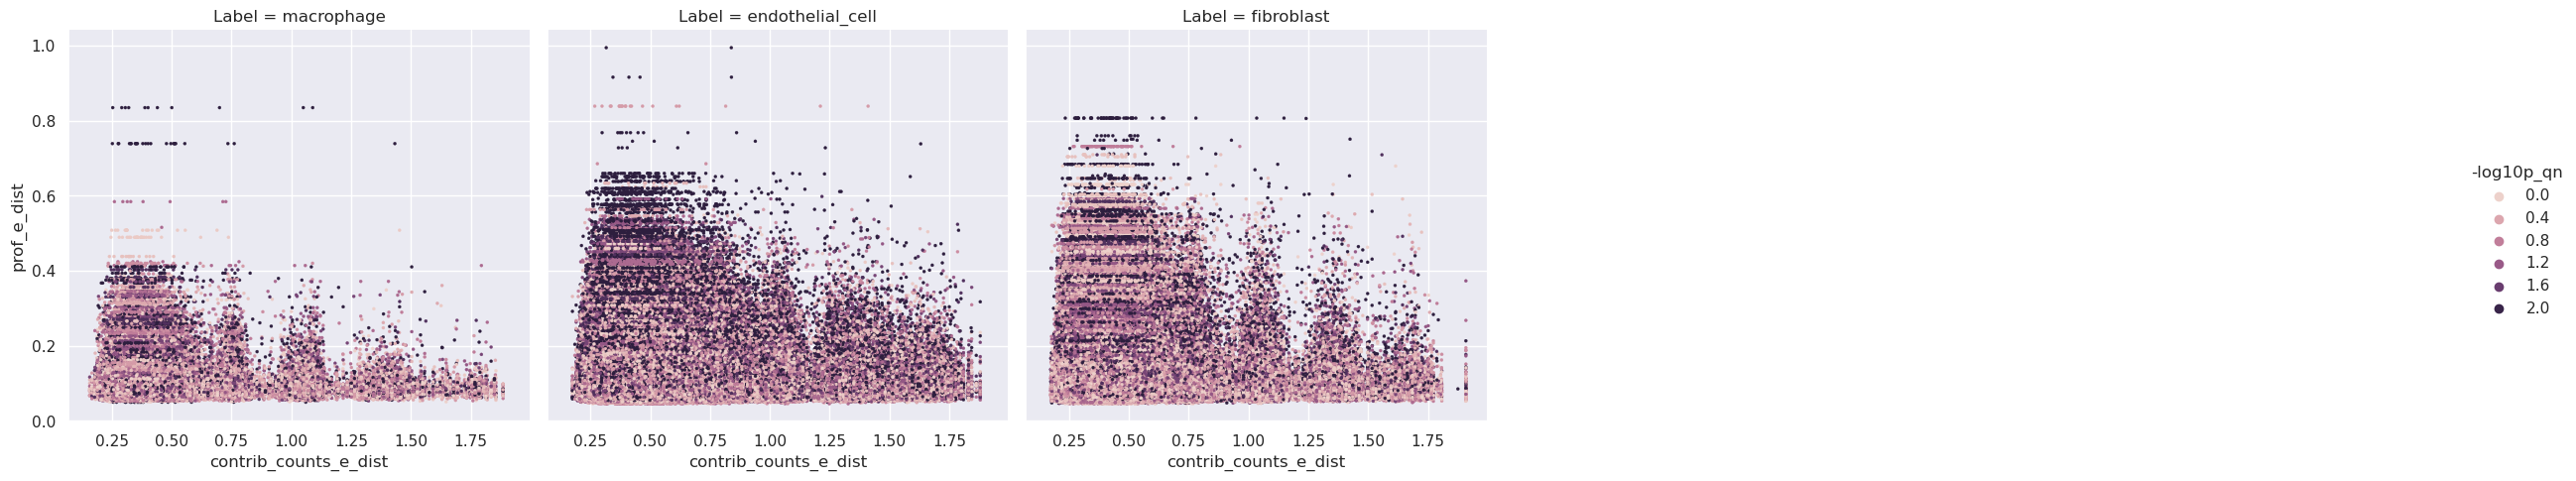

In [11]:
g = sns.relplot(data=data, x="contrib_counts_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

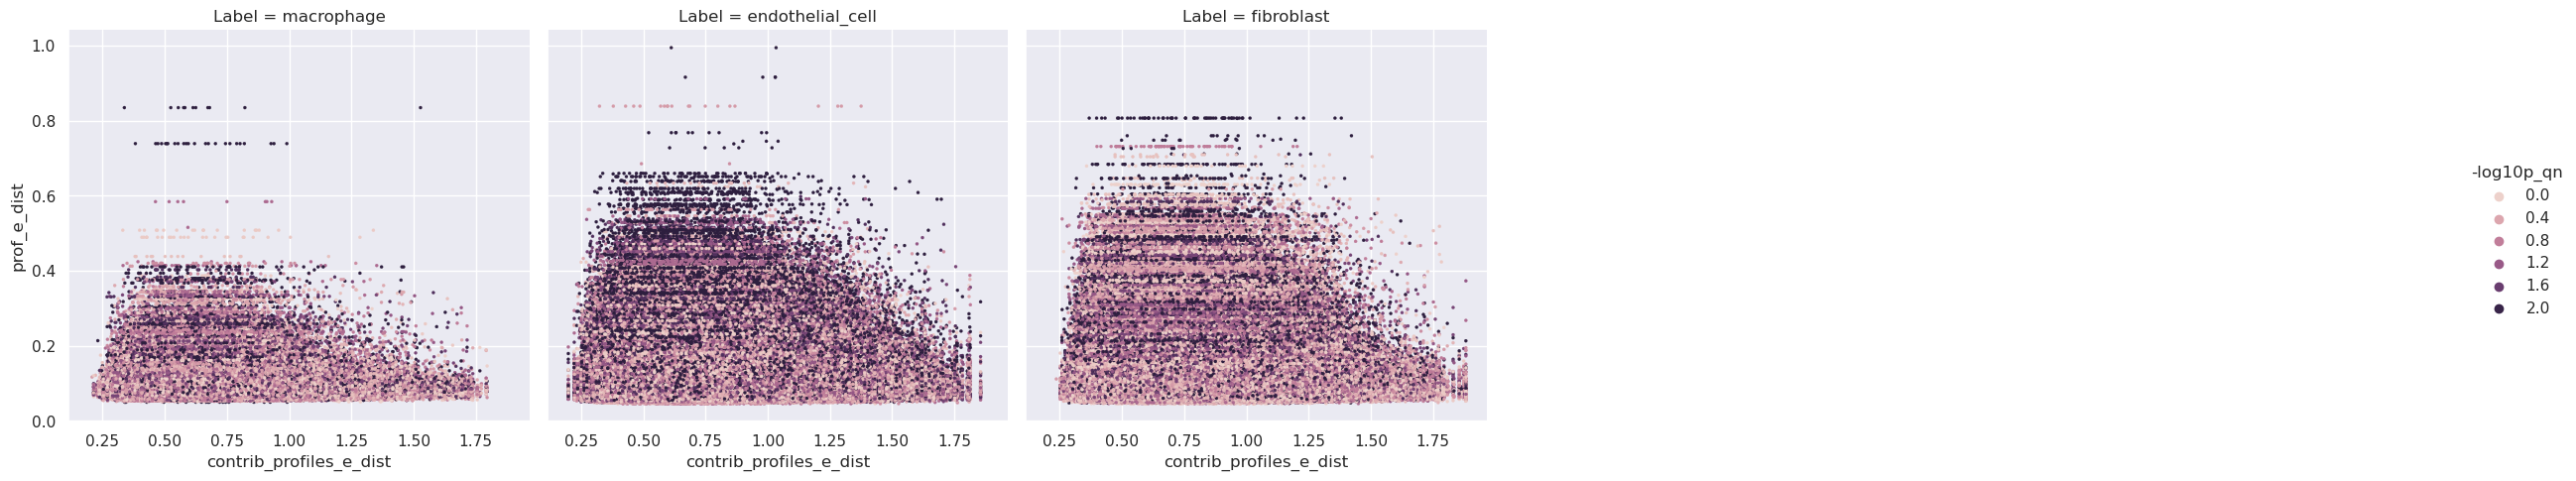

In [12]:
g = sns.relplot(data=data, x="contrib_profiles_e_dist", y="prof_e_dist", col="Label", hue="-log10p_qn", col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


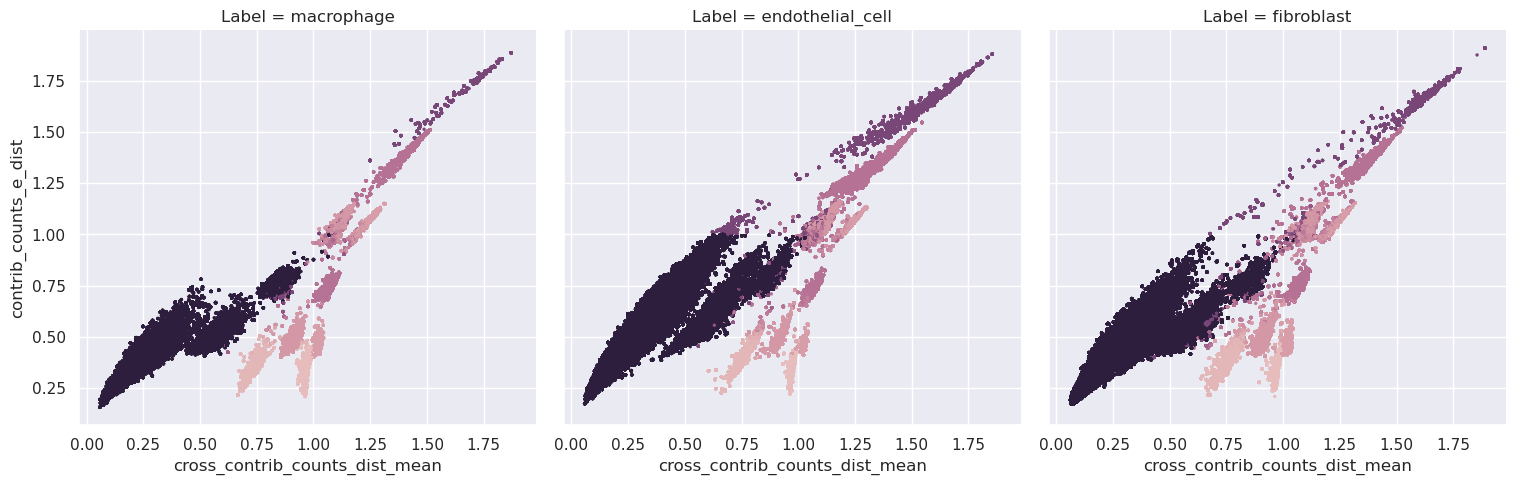

In [13]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="contrib_counts_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)
/users/atwang/miniconda3/envs/gp_mouse_notebooks/lib/python3.10/site-packages/matplotlib/colors.py:1350: RuntimeWarning: invalid value encountered in divide
  resdat /= (vmax - vmin)


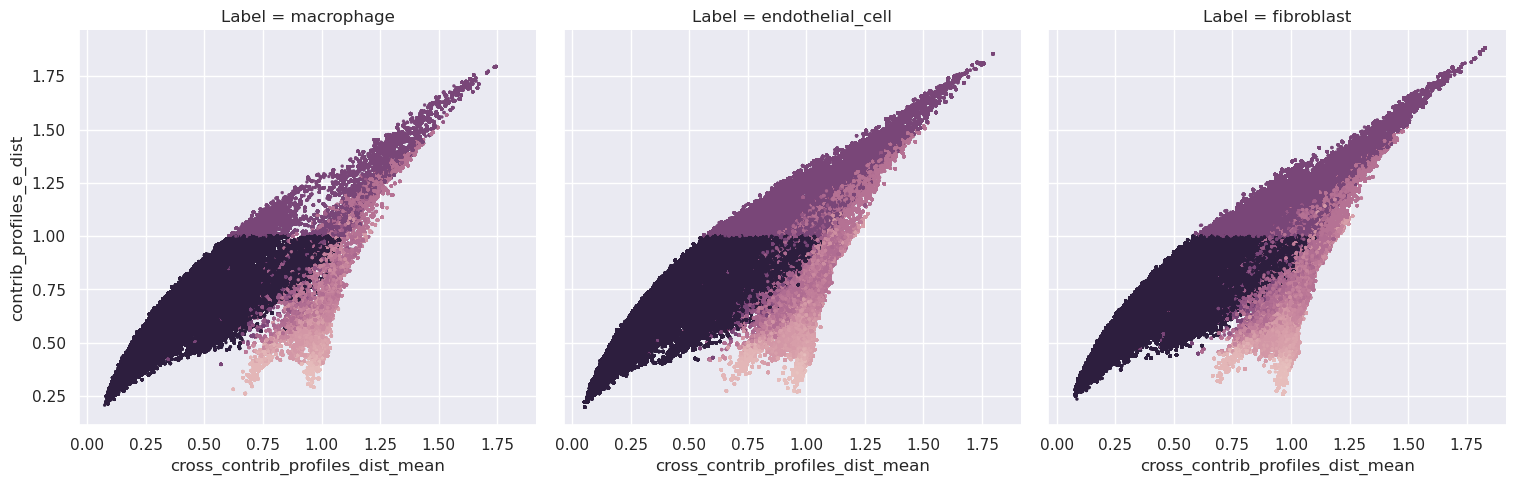

In [14]:
sns.relplot(data=data, x="cross_contrib_profiles_dist_mean", y="contrib_profiles_e_dist", col="Label", hue="contrib_profiles_nlp", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

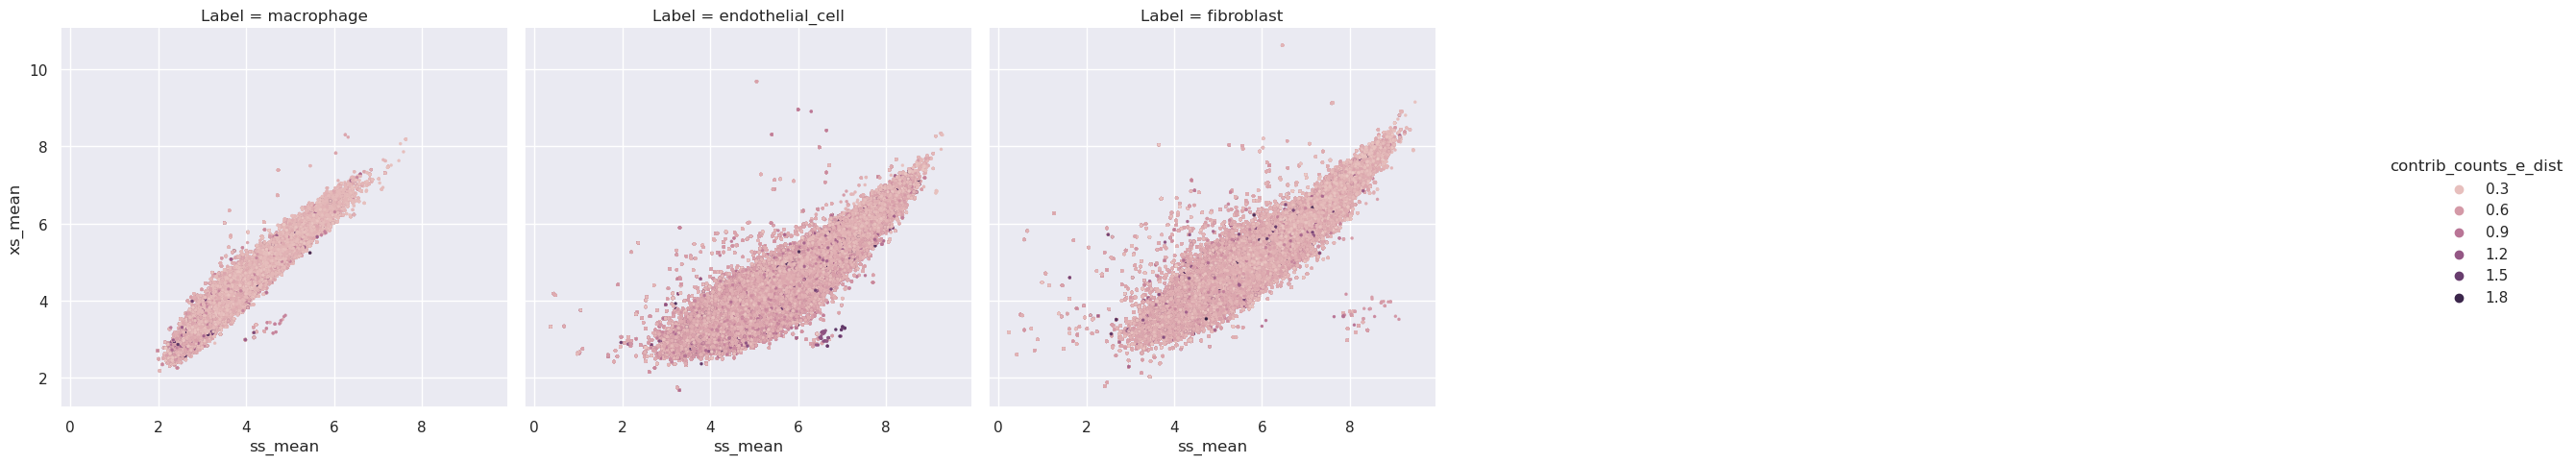

In [39]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_counts_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

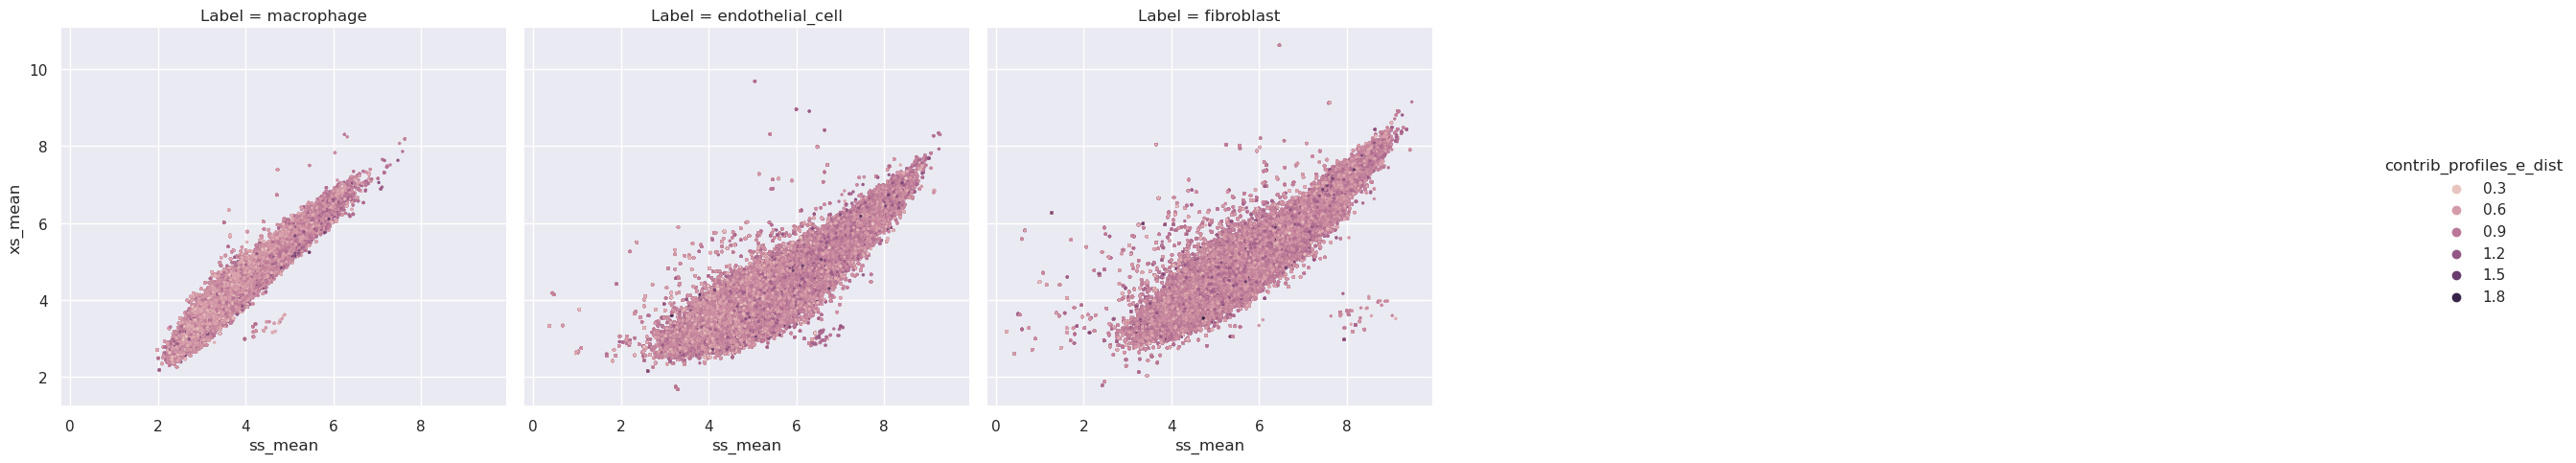

In [4]:
g = sns.relplot(data=data, x="ss_mean", y="xs_mean", hue="contrib_profiles_e_dist", col="Label", col_wrap=5, s=5, edgecolor=None)
# g.set(xscale="log")
# g.set(yscale="log")

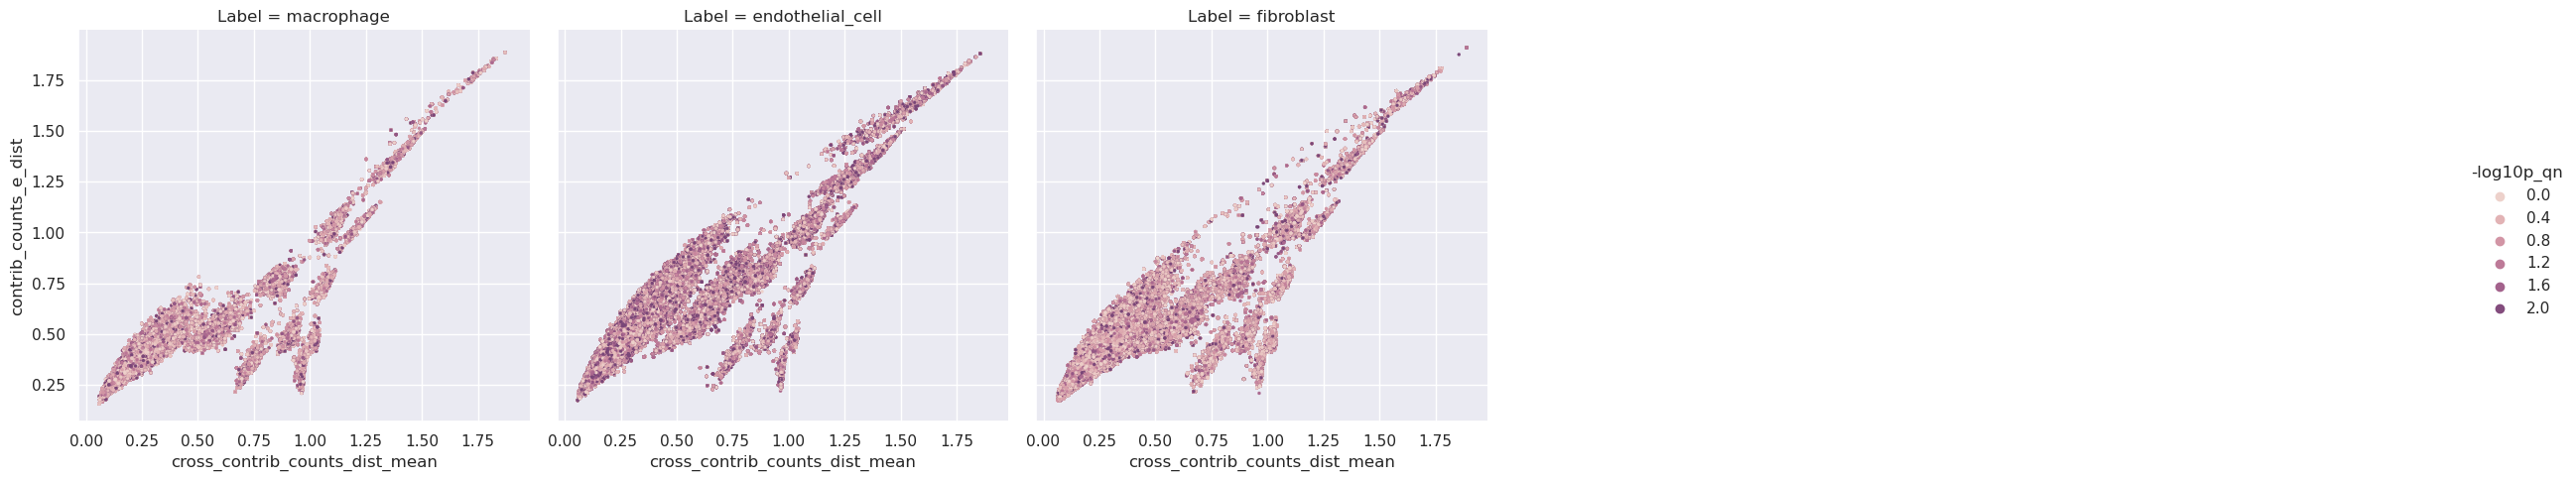

In [5]:
sns.relplot(data=data, x="cross_contrib_counts_dist_mean", y="contrib_counts_e_dist", col="Label", hue="-log10p_qn", hue_norm=(0,3), col_wrap=5, s=5, edgecolor=None)

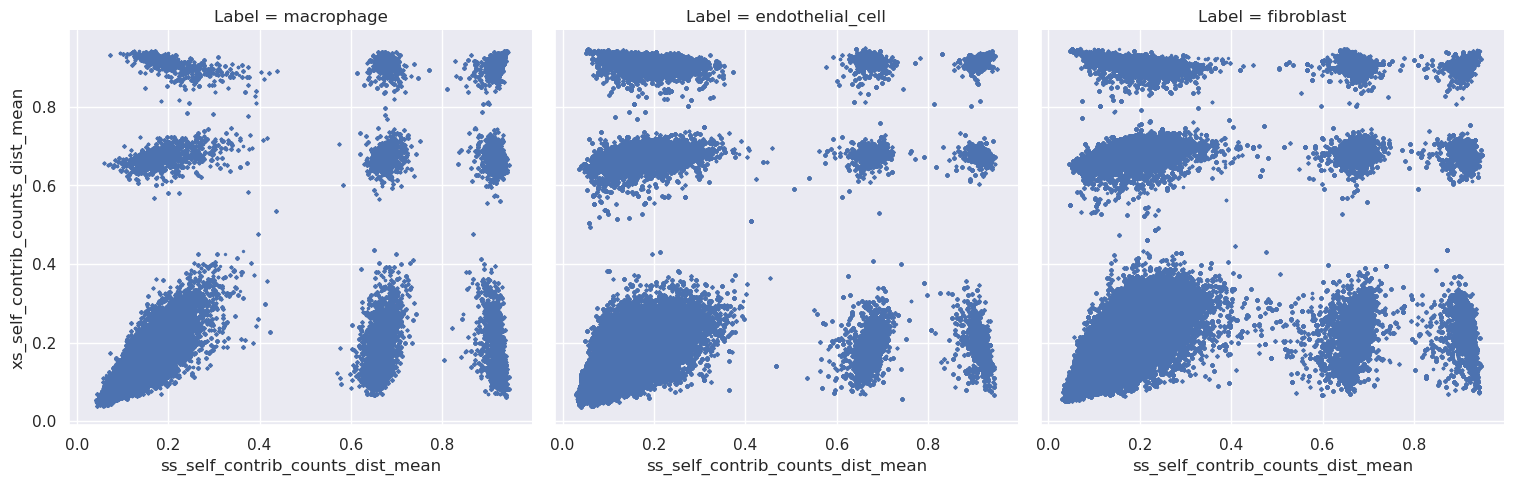

In [6]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


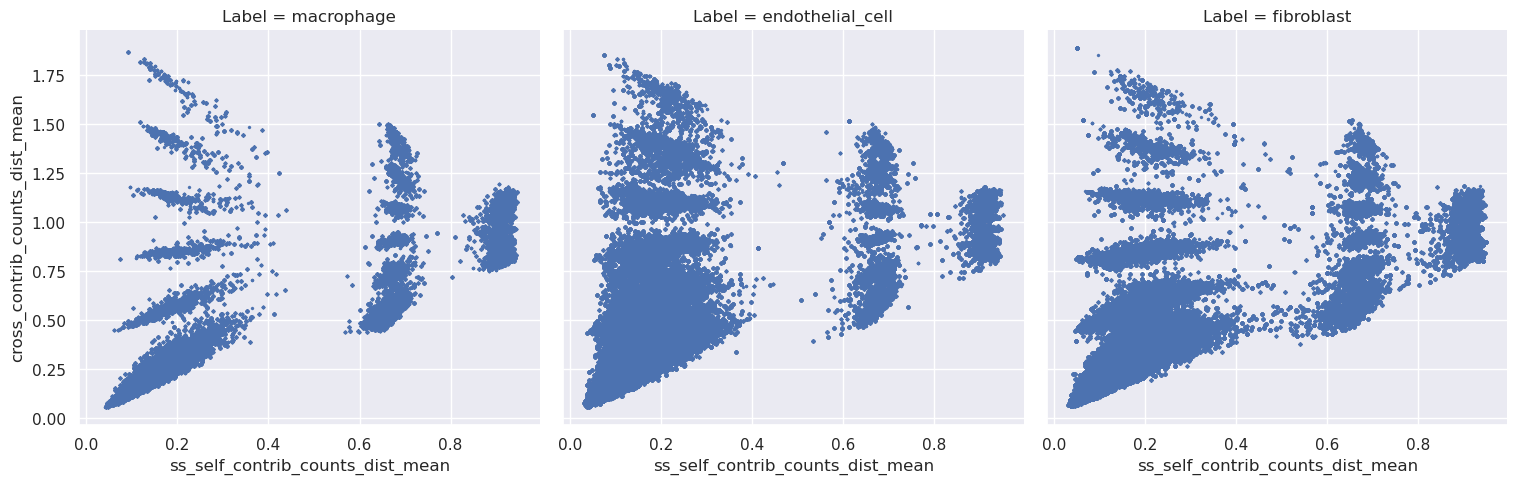

In [7]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="cross_contrib_counts_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


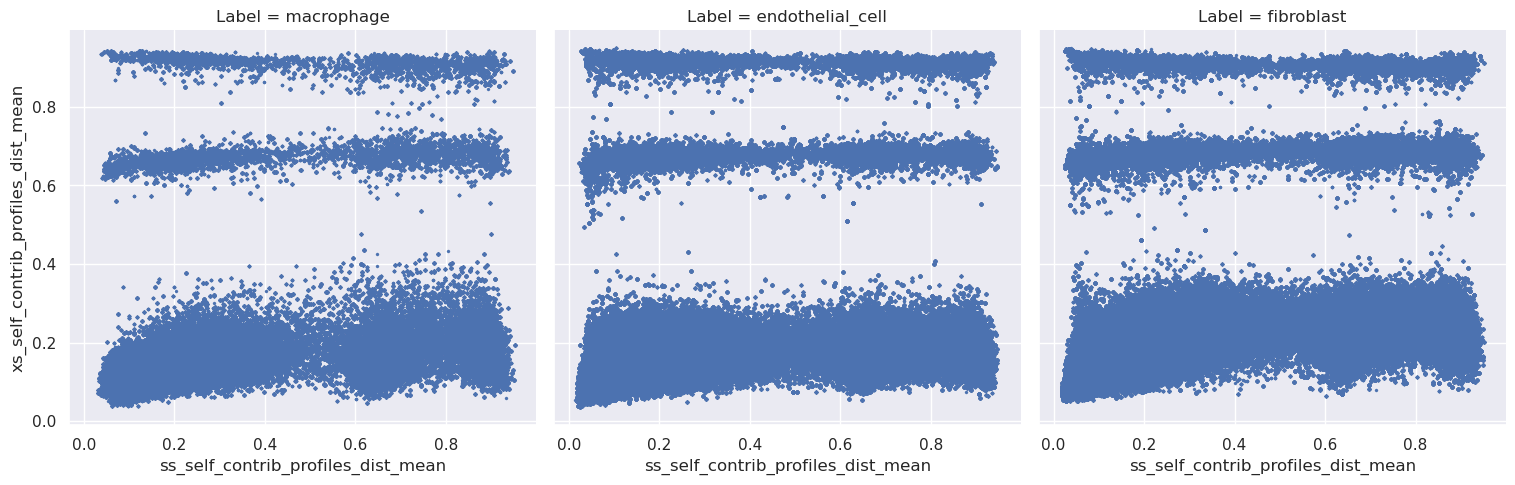

In [8]:
sns.relplot(data=data, x="ss_self_contrib_profiles_dist_mean", y="xs_self_contrib_profiles_dist_mean", col="Label", col_wrap=5, s=5, edgecolor=None)


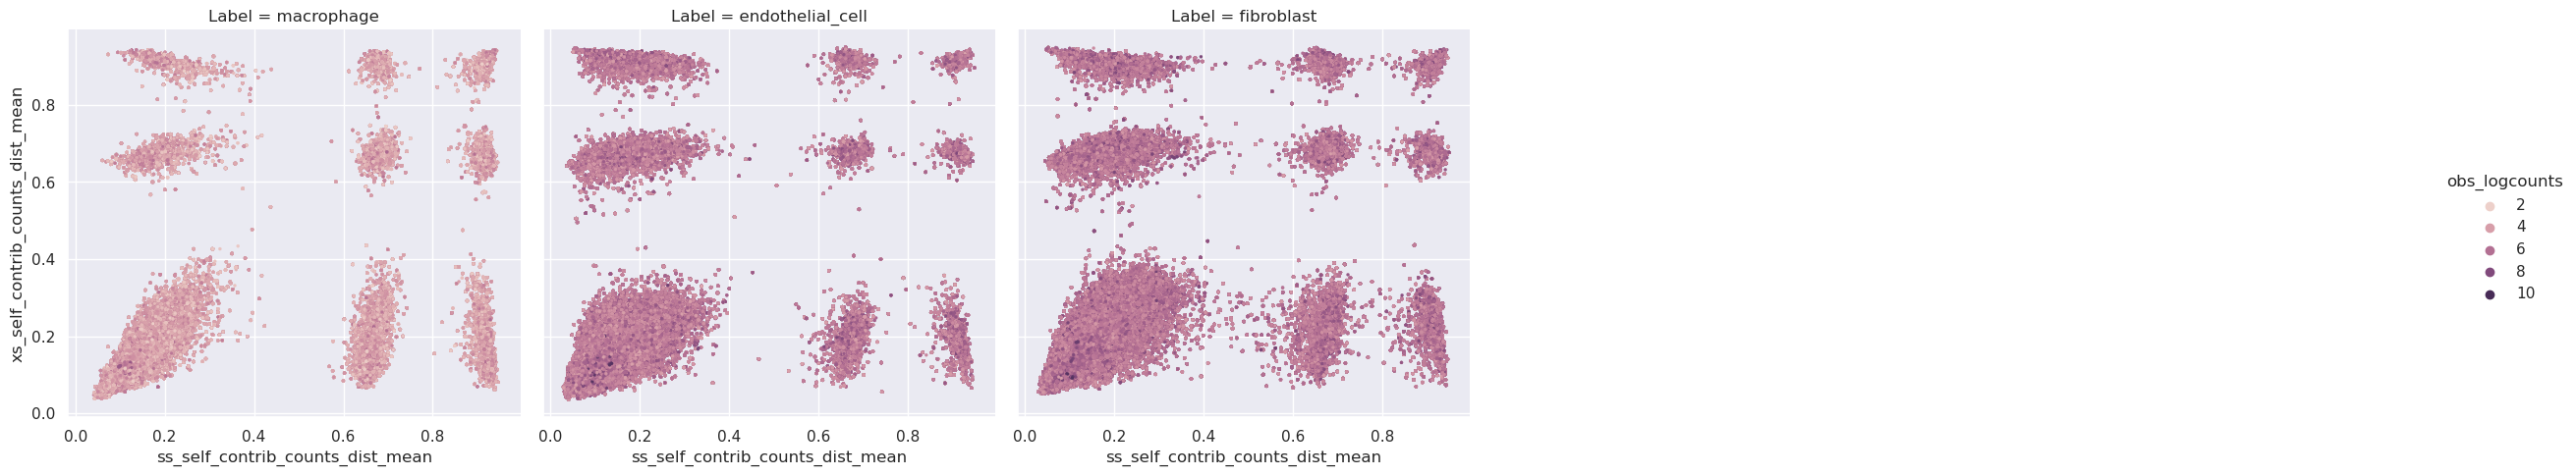

In [9]:
sns.relplot(data=data, x="ss_self_contrib_counts_dist_mean", y="xs_self_contrib_counts_dist_mean", col="Label", hue="obs_logcounts", col_wrap=5, s=5, edgecolor=None)


In [10]:
from scipy import stats

grouped = data.groupby("Label")
header = ["Label", "SpearmanSame", "SpearmanCross", "SpearmanObserved"]
records = []
for name, group in grouped:
    fold_0_ss = group[['fold_0_ss']].to_numpy()
    fold_1_ss = group[['fold_1_ss']].to_numpy()
    fold_0_xs = group[['fold_0_xs']].to_numpy()
    observed = group[['obs_logcounts']].to_numpy()
    corr_ss = stats.spearmanr(fold_0_ss, fold_1_ss).correlation
    corr_xs = stats.spearmanr(fold_0_ss, fold_0_xs).correlation
    corr_observed = stats.spearmanr(fold_0_ss, observed).correlation
    records.append([name, corr_ss, corr_xs, corr_observed])
    
corrs = pd.DataFrame.from_records(records, columns=header)
corrs

Label  SpearmanSame  SpearmanCross  SpearmanObserved
0  endothelial_cell      0.873203       0.750736          0.666437
1        fibroblast      0.881964       0.811472          0.655304
2        macrophage      0.937621       0.915503          0.656050

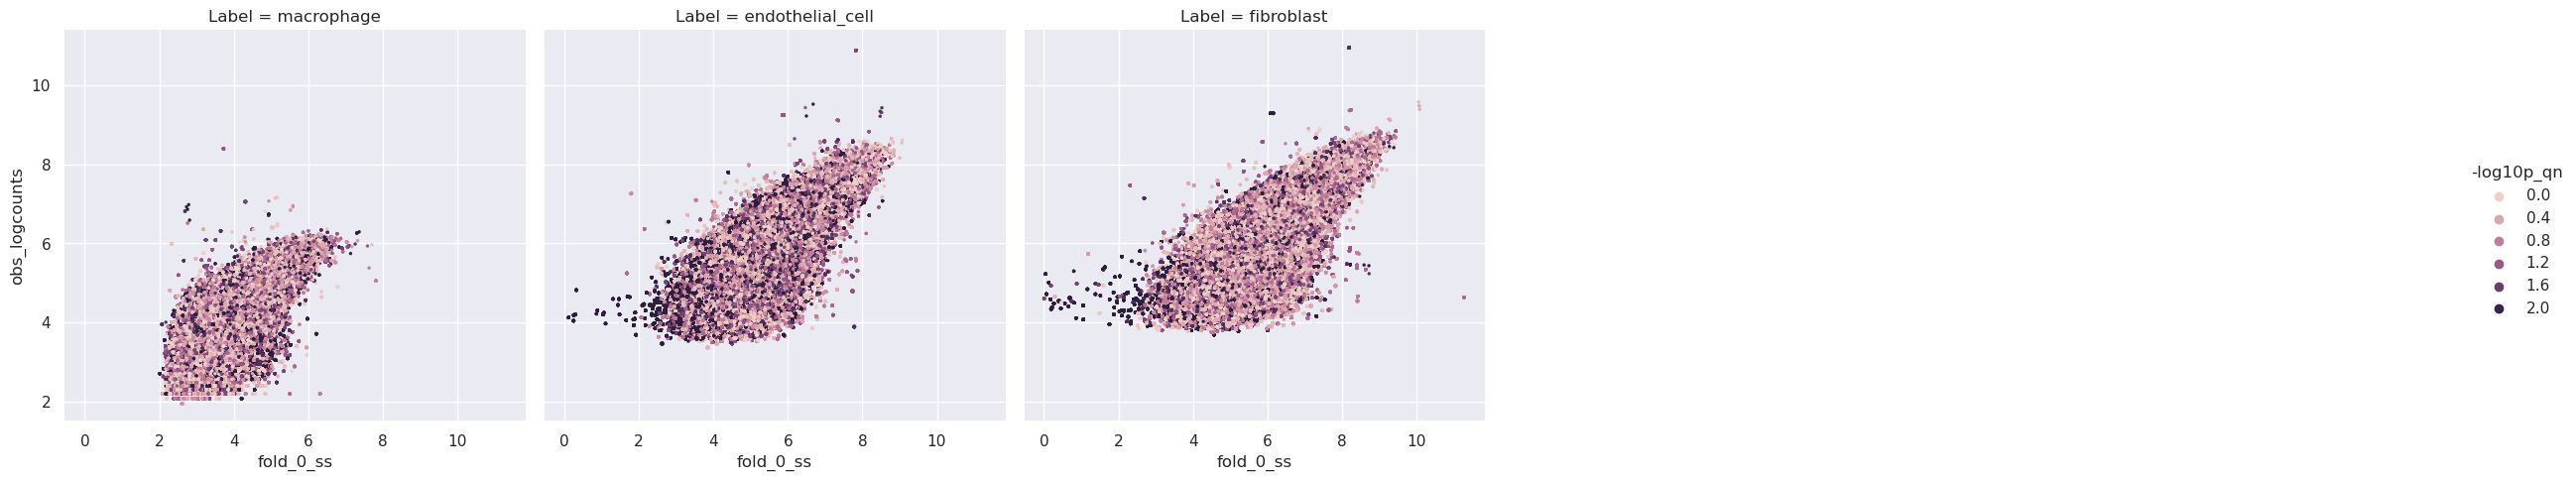

In [11]:
sns.relplot(data=data, x="fold_0_ss", y="obs_logcounts", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. True counts

We look a the fold 0 mouse model predictions compared the true counts on mouse peaks.  

The x axis is the predicted log10 counts as predicted by the mouse model. The y axis is the log1p true counts for the same peaks. Note that these values are on different scales but they are linearly related.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

## Predicted vs. predicted counts

We look a the fold 0 mouse model predictions compared the fold 1 mouse model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 1 mouse model.

And as before, the color indicates the significance of the difference between species.

There seems to be an enrichment of significant peaks in inputs with low model predictive accuracy. This indicates potential false positives we should watch out for. 

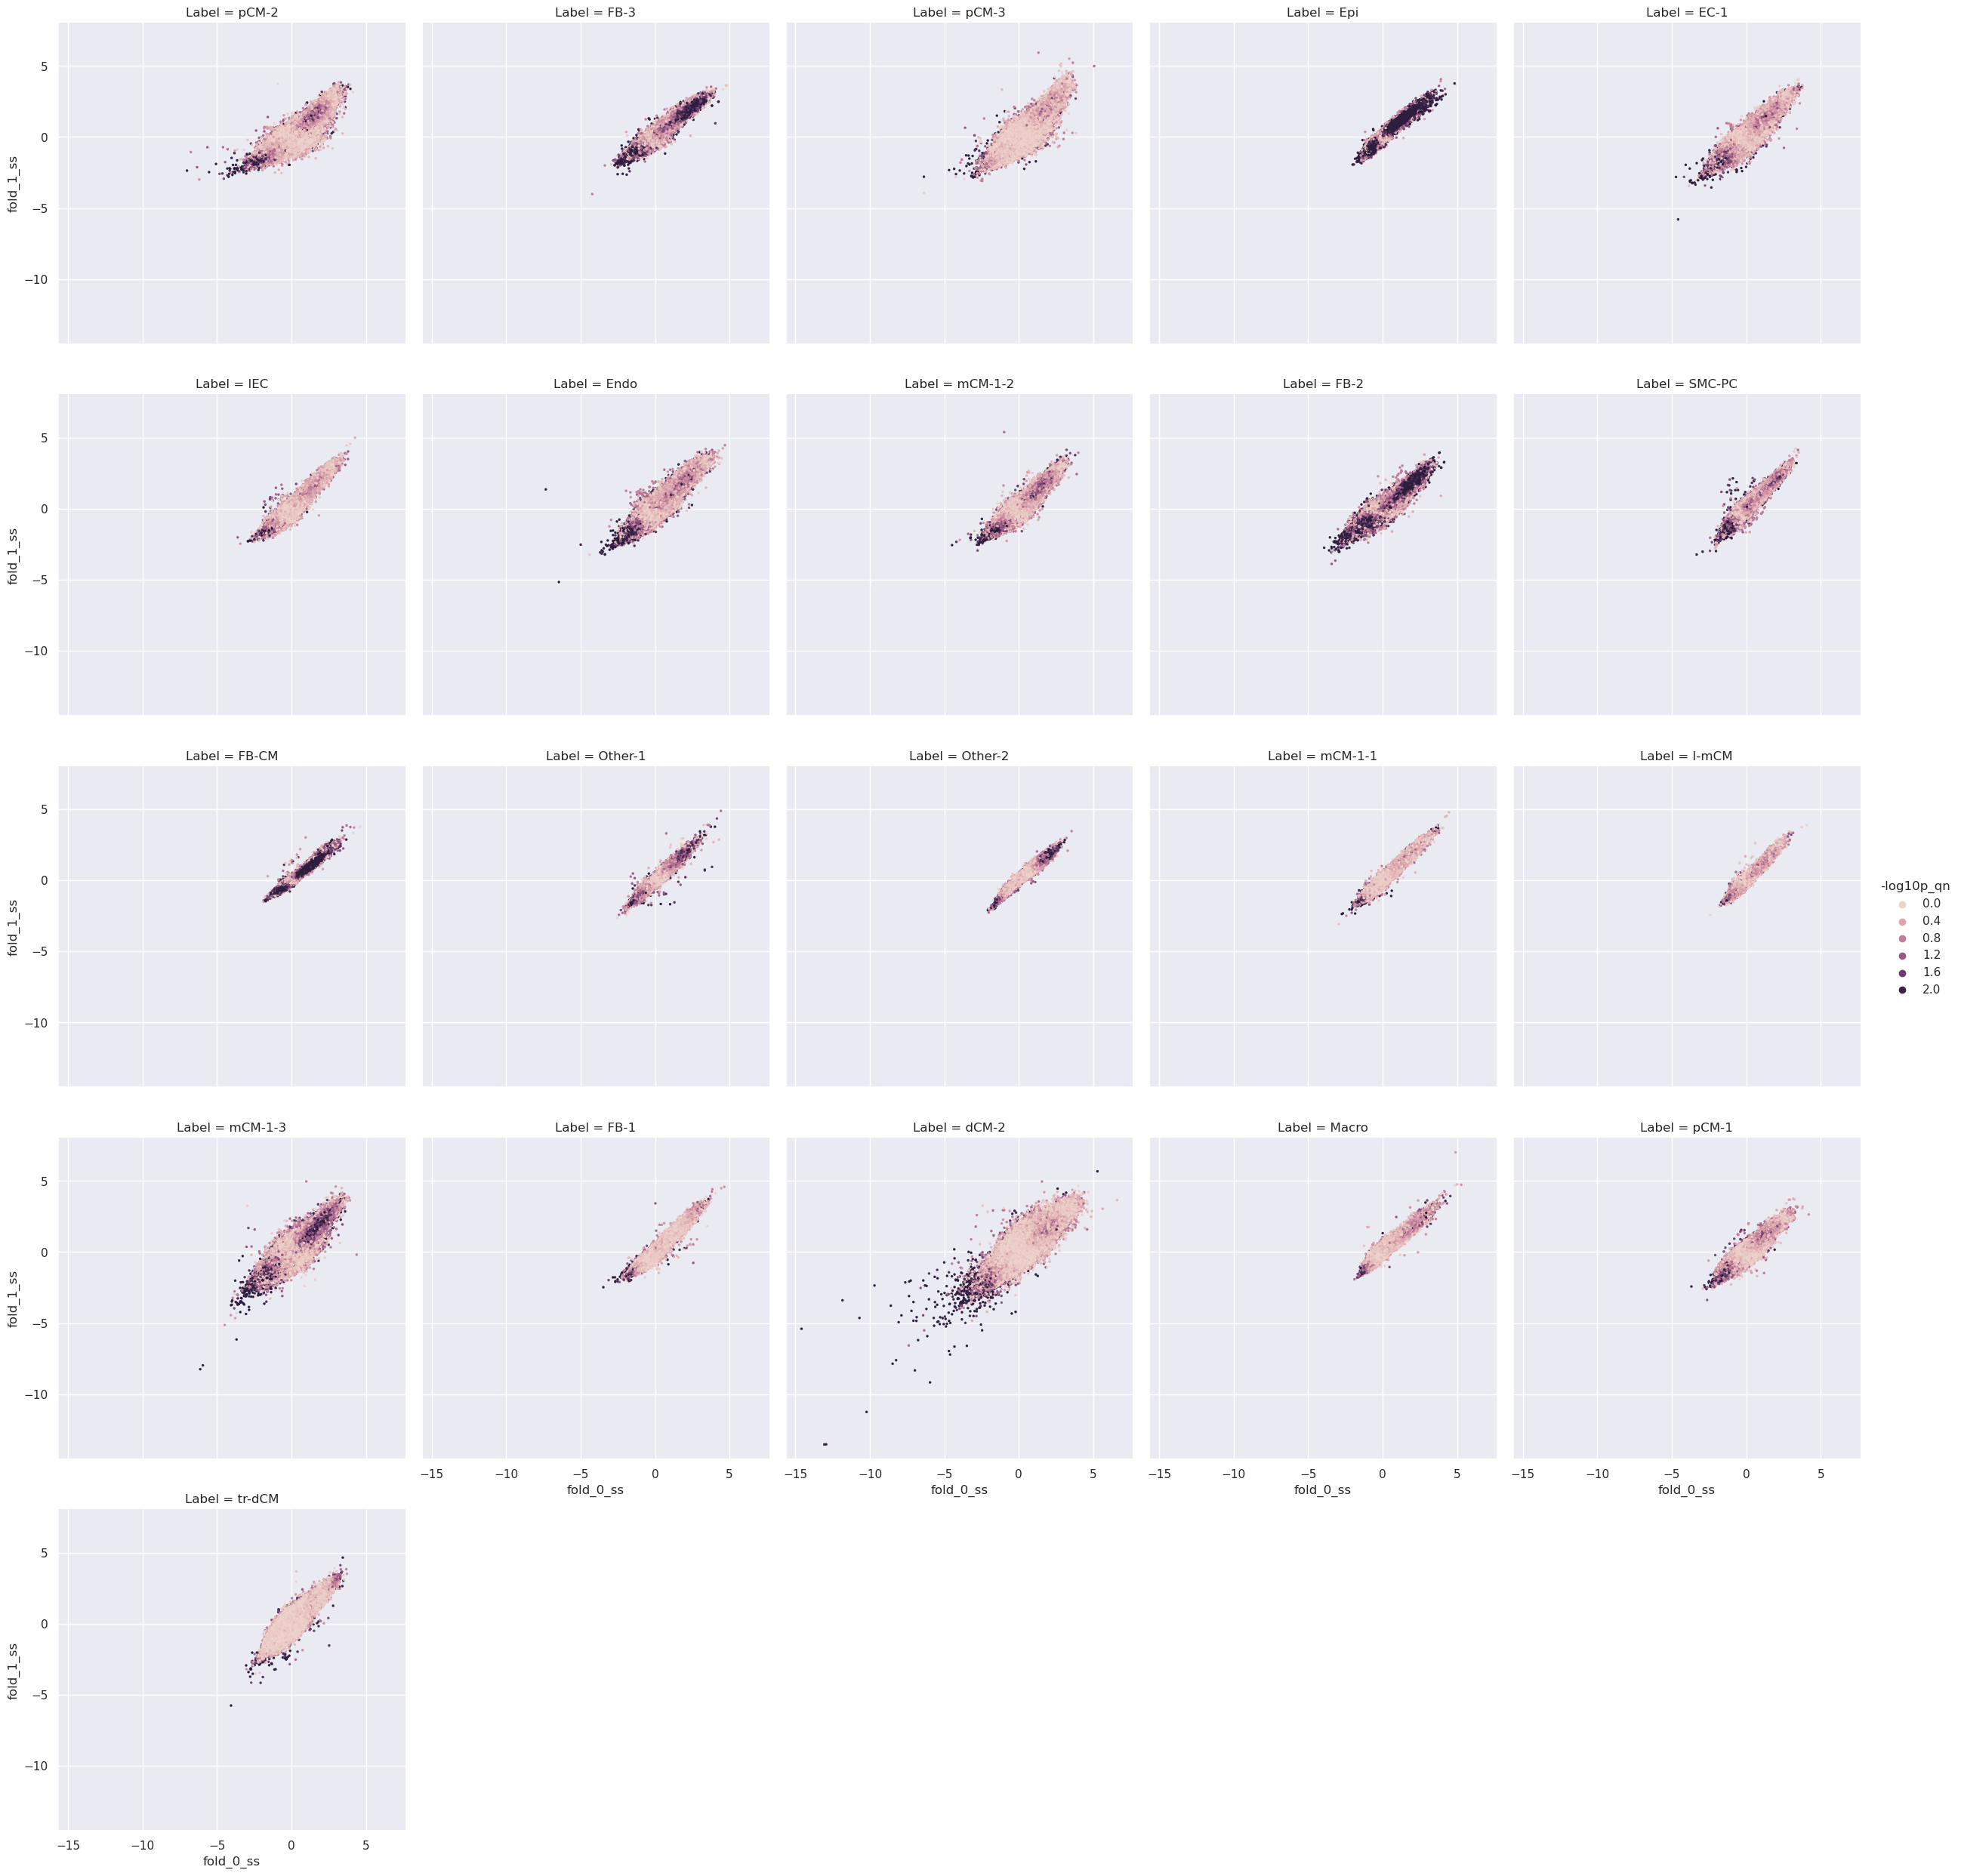

In [14]:
sns.relplot(data=data, x="fold_0_ss", y="fold_1_ss", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Predicted vs. cross-species predicted counts

We look a the fold 0 mouse model predictions compared the fold 0 GP model predictions.  

The x axis is the predicted log10 counts as predicted by the fold 0 mouse model. The y axis is the predicted log10 counts as predicted by the fold 0 GP model.

And as before, the color indicates the significance of the difference between species.

As expected, significantly different peaks tend to be at the edges of the distribution

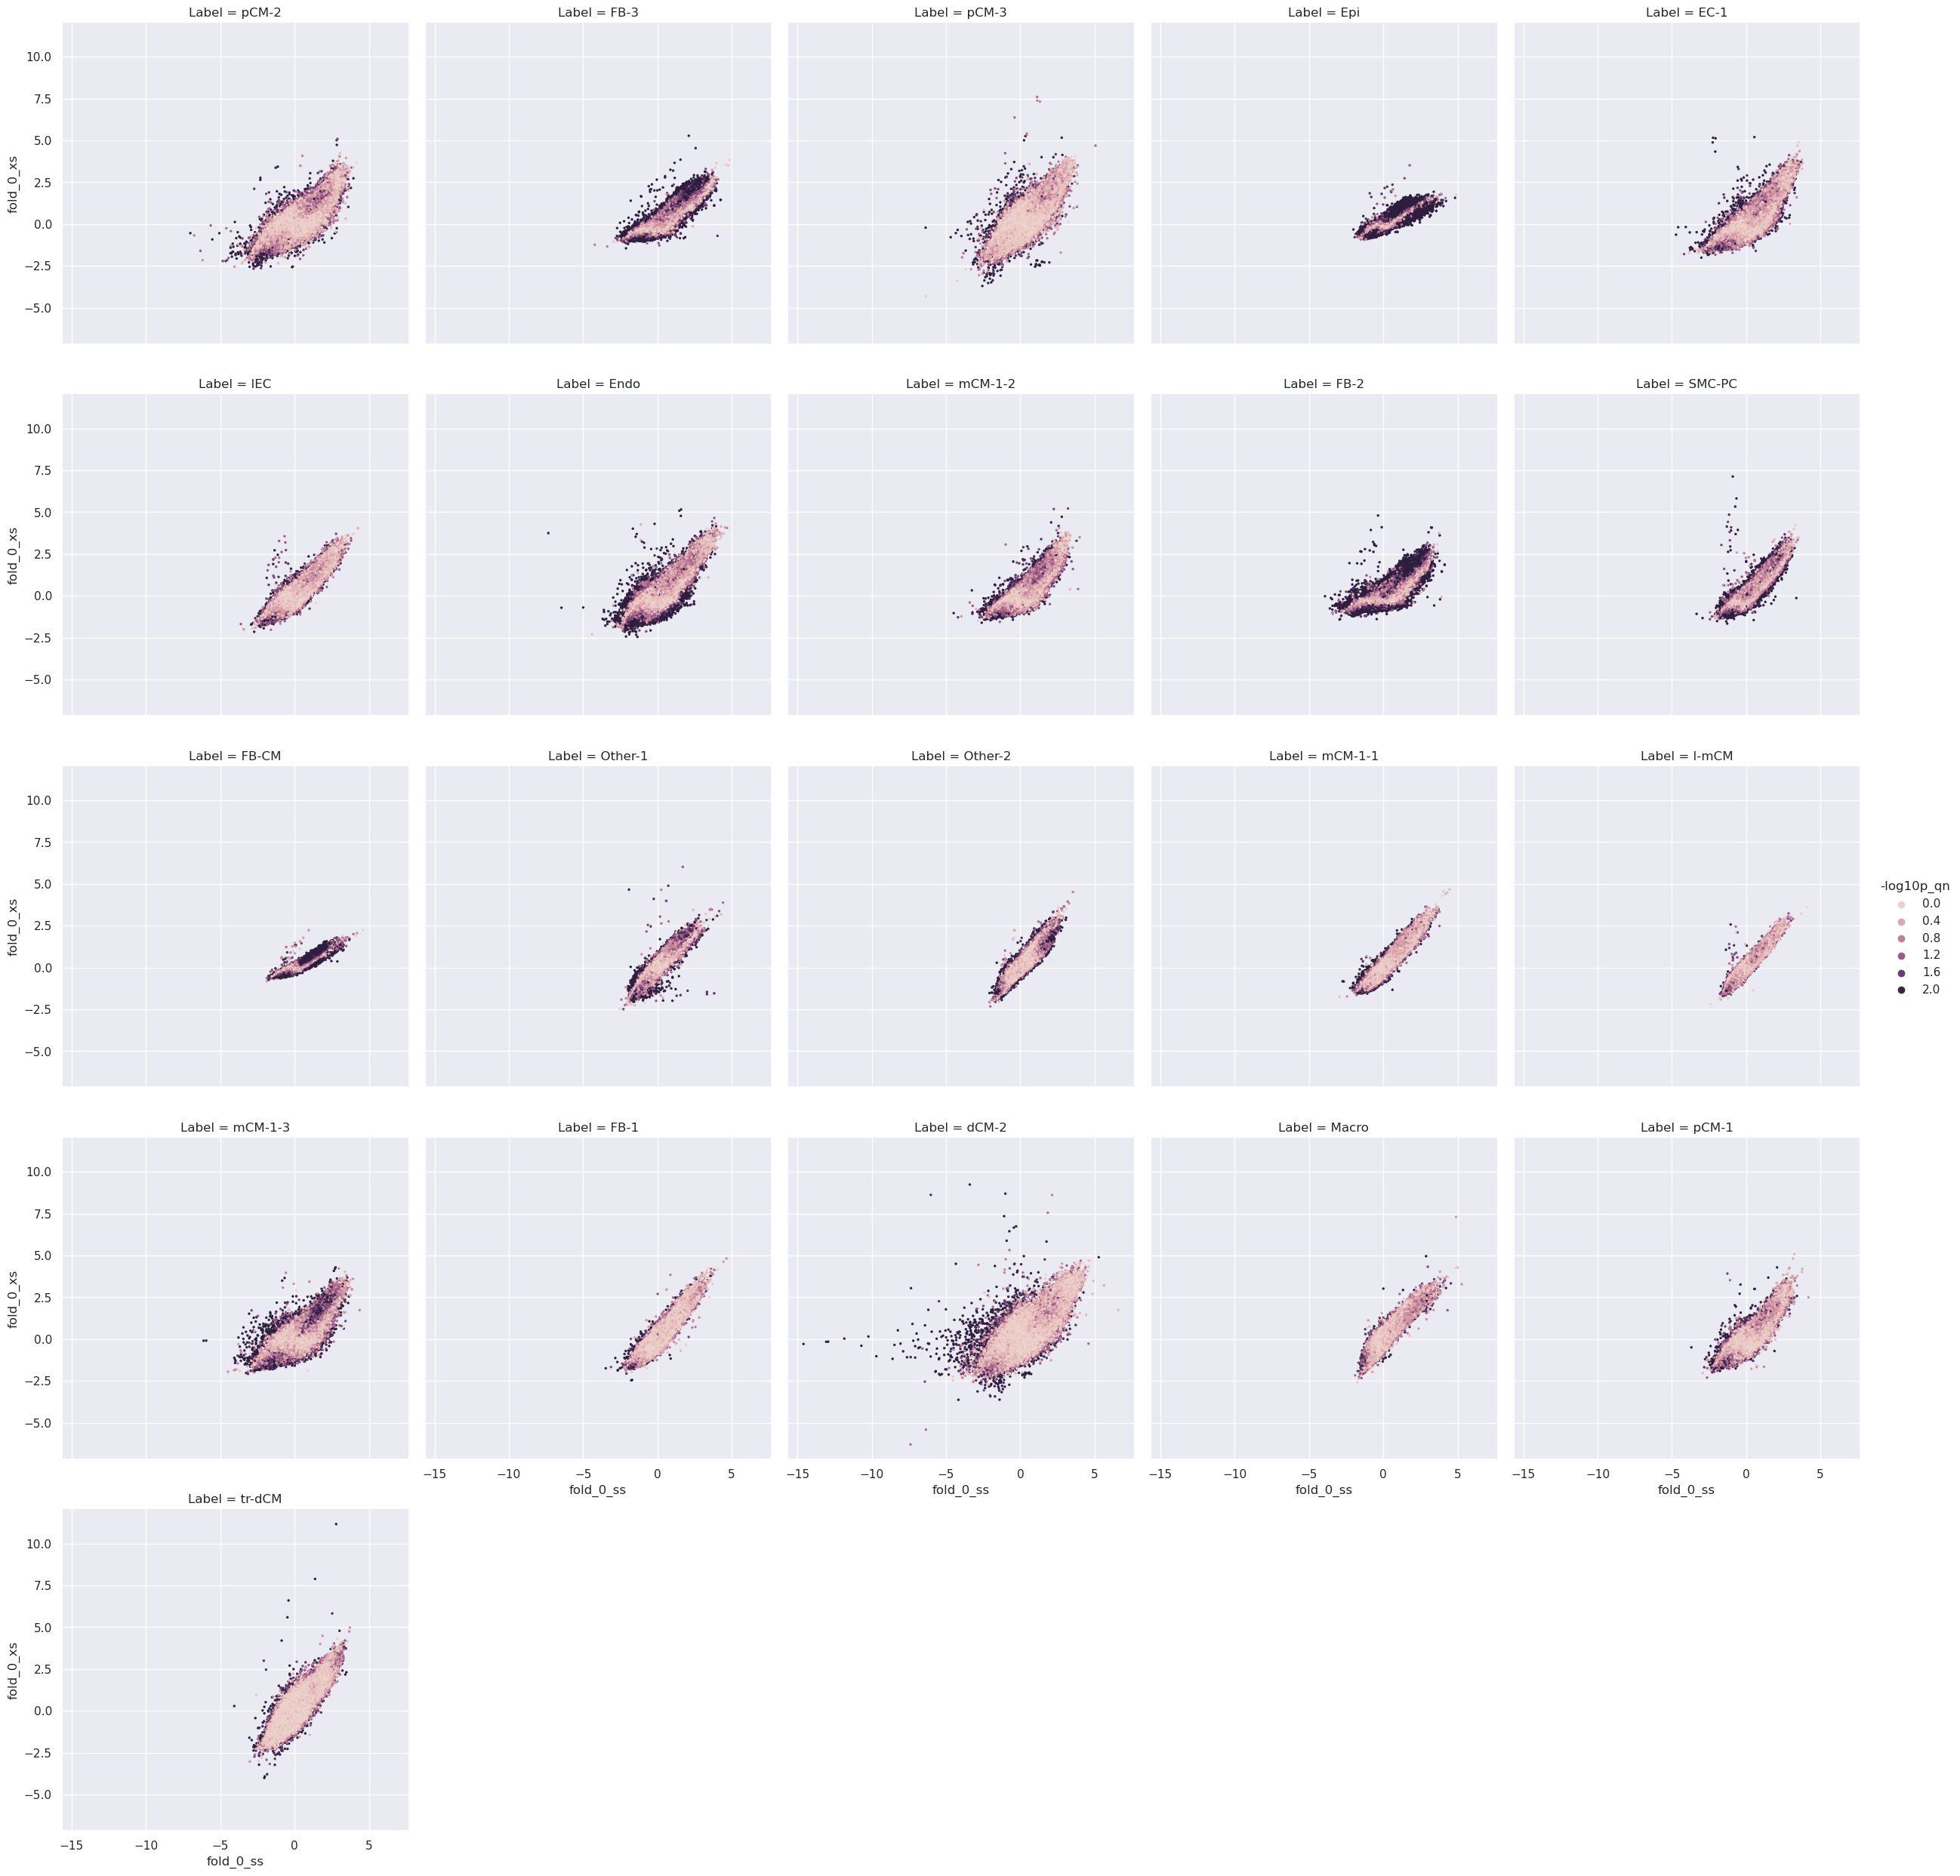

In [15]:
sns.relplot(data=data, x="fold_0_ss", y="fold_0_xs", hue="-log10p_qn", col="Label", col_wrap=5, s=5, edgecolor=None)


## Quantitative cross-species prediction performance

Lastly, we look at the predictive cross_species performance for each cell type using spearman correlation across peaks.

SpearmanSame is the correlation of predicted counts from two folds of mouse model. This serves as an upper bound of cross-species predictive performance

SpearmanCross is the correlation of predicted counts from a mouse model with the predicted counts from the corresponding GP model. 

SpearmanObserved is the correlation of observed counts from a mouse model with true observed mouse counts.

We see that SpearmanCross is substantially closer to SpearmanSame than to SpearmanObserved, indicating that the predicted counts between two species correspond much more strongly than the predicted vs. true counts in the same species